In [ ]:
!pip install IMdBPY

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 298 kB 5.1 MB/s 


In [ ]:
import imdb
import pandas as pd
import numpy as np
import datetime
import os
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def detail(movie_name,df):
    global e
    moviesDB = imdb.IMDb()
    movies = moviesDB.search_movie(movie_name)
    if (movies):
      id = movies[0].getID()
      movie = moviesDB.get_movie(id)
      movie_reviews = moviesDB.get_movie_reviews(id)
      #plot_keywords = moviesDB.get_movie_keywords(id)
      #movie_release_date = moviesDB.get_movie_release_info(id)
      try:
        title = movie_name
      except:
        title = 'None'
      try:
        year = movie['year']
      except:
        year = 'None'
      try:
        rating = movie['rating']
      except:
        rating = 'None'
      try:
        casting = movie['cast']
      except:
        casting = 'None'
      try:
        Genre = movie['genre']
      except:
        Genre = 'None'
      try:
        imdbID = movie['imdbID']
      except:
        imdbID = 'None'
      try:
        votes = movie['votes']
      except:
        votes = 'None'
      try:
        plot_summary = movie["plot"]
      except:
        plot_summary = 'None'
      columns = [title,year,rating,casting,Genre,imdbID,votes,plot_summary]
      print(columns)
      #plot_keywords = movie["synopsis"]
      GENRE = ''
      for g in Genre:
          GENRE = GENRE+g+','
      GENRE = GENRE[:-1]
      df1= pd.DataFrame({
          'title':title,
          'IMDB id':id,
          'year':year,
          'genre': GENRE,
          'cast':str(casting),
          'plot_summary':str(plot_summary),
          'rating': rating,
          'votes':votes
      },index=[0])
      return df1
    else:
      return pd.DataFrame()

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Bollywood Movies Dataset.xlsx - Sheet1.csv")
movies_list = df["Movie Title"].to_list()
Movies_df = pd.DataFrame()
for i in range(len(movies_list)):
  df1 = detail(movies_list[i],df)
  if df1.empty:
    pass
  else:
    Movies_df = Movies_df.append(df1,ignore_index=True)

In [ ]:
Movies_df = pd.read_csv("/content/Movies Data Frame.csv")

In [ ]:
Movies_df.head()

,Unnamed: 0,title,IMDB id,year,genre,cast,plot_summary,rating,votes,reviews
0,0,3 Idiots,1187043,2009,"Comedy,Drama","[<Person id:0451148[http] name:_Aamir Khan_>, ...",['Two friends are searching for their long los...,8.4,387136,None
1,1,Taare Zameen Par,986264,2007,"Drama,Family",[<Person id:2594301[http] name:_Darsheel Safar...,['An eight-year-old boy is thought to be a laz...,8.3,188982,None
2,2,PK (film),7424106,2008,Documentary,[<Person id:12429606[http] name:_David Aitken_>],['A collection of short documentaries ponderin...,5.5,34,None
3,3,Dangal (film),7415426,2017,Talk-Show,[<Person id:4929323[http] name:_Leonardo Hwan_>],None,None,None,None
4,4,Rang De Basanti,405508,2006,"Comedy,Crime,Drama","[<Person id:0451148[http] name:_Aamir Khan_>, ...",['The story of six young Indians who assist an...,8.1,118232,None


In [ ]:
Movies_df = pd.read_csv("/content/Movies Data Frame.csv")
Movies_df.drop('reviews',axis=1,inplace=True)
Movies_df.head()

,Unnamed: 0,title,IMDB id,year,genre,cast,plot_summary,rating,votes
0,0,3 Idiots,1187043,2009,"Comedy,Drama","[<Person id:0451148[http] name:_Aamir Khan_>, ...",['Two friends are searching for their long los...,8.4,387136
1,1,Taare Zameen Par,986264,2007,"Drama,Family",[<Person id:2594301[http] name:_Darsheel Safar...,['An eight-year-old boy is thought to be a laz...,8.3,188982
2,2,PK (film),7424106,2008,Documentary,[<Person id:12429606[http] name:_David Aitken_>],['A collection of short documentaries ponderin...,5.5,34
3,3,Dangal (film),7415426,2017,Talk-Show,[<Person id:4929323[http] name:_Leonardo Hwan_>],None,None,None
4,4,Rang De Basanti,405508,2006,"Comedy,Crime,Drama","[<Person id:0451148[http] name:_Aamir Khan_>, ...",['The story of six young Indians who assist an...,8.1,118232


In [ ]:
Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036 entries, 0 to 3035
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    3036 non-null   int64 
 1   title         3036 non-null   object
 2   IMDB id       3036 non-null   int64 
 3   year          3036 non-null   object
 4   genre         3036 non-null   object
 5   cast          3036 non-null   object
 6   plot_summary  3036 non-null   object
 7   rating        3036 non-null   object
 8   votes         3036 non-null   object
dtypes: int64(2), object(7)
memory usage: 213.6+ KB


In [ ]:
Movies_df.to_csv("/content/Movies Data Frame.csv")

In [ ]:
Movies_df.replace('None',np.nan,inplace=True)
Movies_df['year'].replace(np.nan,0,inplace=True)
Movies_df['rating'].replace(np.nan,0,inplace=True)

In [ ]:
Movies_df["IMDB id"] = Movies_df['IMDB id'].astype('int')
Movies_df["year"] = Movies_df['year'].astype('int')
Movies_df["rating"] = Movies_df['rating'].astype('float')
Movies_df["votes"] = Movies_df['IMDB id'].astype('int')

In [ ]:
Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036 entries, 0 to 3035
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3036 non-null   int64  
 1   title         3036 non-null   object 
 2   IMDB id       3036 non-null   int64  
 3   year          3036 non-null   int64  
 4   genre         3036 non-null   object 
 5   cast          2969 non-null   object 
 6   plot_summary  2866 non-null   object 
 7   rating        3036 non-null   float64
 8   votes         3036 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 213.6+ KB


In [ ]:
Movies_df.isnull().sum()

Unnamed: 0        0
title             0
IMDB id           0
year              0
genre             0
cast             67
plot_summary    170
rating            0
votes             0
dtype: int64

In [ ]:
Movies_df.dropna(inplace=True)

In [ ]:
Movies_review = list()
movies1 = imdb.IMDb()
moviesDB1 = Movies_df['title'].to_list()
for i in range(len(moviesDB1)):
  movies = movies1.search_movie(moviesDB1[i])
  if (movies):
      id = movies[0].getID()
      movie = movies1.get_movie_reviews(id)
      try:
        Movies_review.append(movie['data']['reviews'][0]['content'])
      except:
        Movies_review.append(np.nan)

In [ ]:
for i in range(2010,len(moviesDB1)):
  Movies_review.append(np.nan)


In [ ]:

Movies_df['Review'] = Movies_review
Movies_df.info() 

In [ ]:
Movies_df = pd.read_csv("/content/Final Movies Data Frame.csv")

In [ ]:
Movies_df['Review'] = Movies_df['Review'].replace(np.nan,'No review')
Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2854 non-null   int64  
 1   Unnamed: 0.1     2854 non-null   int64  
 2   title            2854 non-null   object 
 3   IMDB id          2854 non-null   int64  
 4   year             2854 non-null   int64  
 5   genre            2854 non-null   object 
 6   cast             2854 non-null   object 
 7   plot_summary     2854 non-null   object 
 8   rating           2854 non-null   int64  
 9   votes            2854 non-null   int64  
 10  Age_of_content   2854 non-null   int64  
 11  cast_popularity  2854 non-null   float64
 12  Review           2854 non-null   object 
dtypes: float64(1), int64(7), object(5)
memory usage: 290.0+ KB


In [ ]:
Movies_df.to_csv("/content/Final Movies Data Frame.csv")

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install tensorflow_datasets
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete52C81B/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete52C81B/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete52C81B/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [ ]:
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 5ms/step - loss: 0.5007 - accuracy: 0.7310 - val_loss: 0.3450 - val_accuracy: 0.8471
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2382 - accuracy: 0.9080 - val_loss: 0.3654 - val_accuracy: 0.8398
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0934 - accuracy: 0.9768 - val_loss: 0.4662 - val_accuracy: 0.8238
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0252 - accuracy: 0.9968 - val_loss: 0.5248 - val_accuracy: 0.8251
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0075 - accuracy: 0.9992 - val_loss: 0.5950 - val_accuracy: 0.8242
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6392 - val_accuracy: 0.8275
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 9.5560e-04 - accuracy: 1.0000 - val_loss: 0.6839 - val_accuracy: 0.8279
Ep

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
movie_reviews = Movies_df['Review'].to_list()
sentiment = list()
for mr in movie_reviews:
  sequence = tokenizer.texts_to_sequences([mr])
  print(mr)
  padded = pad_sequences(sequence,maxlen=max_length)
  if model.predict(padded)>0.5:
    print("Positive")
    sentiment.append("Positive")
  else:
    print("Negative")
    sentiment.append("Negative")

Streaming output truncated to the last 5000 lines.
PARCHED REVIEW - I was never interested to watch this film, in fact i never heard about this Film before but suddenly some leak news made waves on social media and i had to download film and watch. And now after watching it i'm speechless, i don't have words to appreciate Film but still i am going to write few words so that Real Cinema Lovers won't miss a gem. Acting - Powerpacked ! The film looks so realistic and its characters looks so real that we actually feel their Pain, Happiness and everything. Surely Best Performance of all Actresses in Film especially Radhika Apte shows her Standard actually raises it and Surween Chawla shines in Bindass Attitude. Screenplay - Marvellous ! It never looked stretched or bored despite being Realistic and Social msg film. Some crispy and vulgar scenes to entertain masses are also there. Classes have everything to taste. Music - Not Impressive ! But Background Score definitely works as shiner for s

# **Perform additional data processing**

**Age of content**

In [ ]:
today_date = datetime.date.today()
present_year = int(today_date.year)
movie_years = Movies_df['year'].to_list()
years = list()
for year in movie_years:
  y = int(present_year-year)
  years.append(y)
Movies_df['Age_of_content'] = years

In [ ]:
Movies_df.head()

,Unnamed: 0,Unnamed: 0.1,title,IMDB id,year,genre,cast,plot_summary,rating,votes,Age_of_content,cast_popularity,Review
0,0,0,3 Idiots,1187043,2009,"Comedy,Drama","['Aamir Khan', 'Madhavan', 'Sharman Joshi', 'K...",['Two friends are searching for their long los...,8,1187043,13,2.188545,"It's hard for me to review this film, as I hav..."
1,1,1,Taare Zameen Par,986264,2007,"Drama,Family","['Darsheel Safary', 'Aamir Khan', 'Tisca Chopr...",['An eight-year-old boy is thought to be a laz...,8,986264,15,0.880498,As I just became aware of this film a few week...
2,2,2,PK (film),7424106,2008,Documentary,['David Aitken'],['A collection of short documentaries ponderin...,5,7424106,14,0.004233,In dieser Dokumentation von dem japanischen Fo...
3,4,4,Rang De Basanti,405508,2006,"Comedy,Crime,Drama","['Aamir Khan', 'Siddharth', 'Sharman Joshi', '...",['The story of six young Indians who assist an...,8,405508,16,2.493333,Paint It Yellow . Oops .that's suppose to be R...
4,5,5,Lagaan,169102,2001,"Drama,Musical,Sport","['Aamir Khan', 'Gracy Singh', 'Rachel Shelley'...",['The people of a small village in Victorian I...,8,169102,21,3.331499,"In 1893, India was a colony of England. The st..."


***Popularity of content***

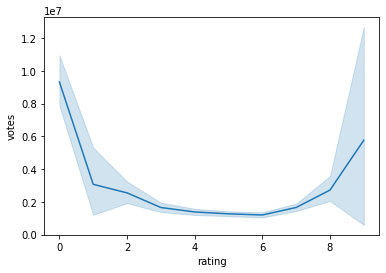

In [ ]:
sns.lineplot(x=Movies_df['rating'],y=Movies_df['votes'])

In [ ]:
Movies_df['rating'].describe()

count    2854.000000
mean        5.288367
std         1.562538
min         0.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: rating, dtype: float64

In [ ]:
Movies_df['rating']=Movies_df['rating'].astype('int')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


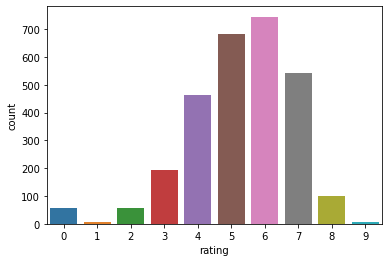

In [ ]:
sns.countplot(Movies_df['rating'])

***Cast popularity score***

In [ ]:
cast_list = Movies_df['cast'].to_list()
overall_cast_names = list()
for i in range(len(cast_list)):
  cast_names = list()
  cl = cast_list[i].split(",")
  for j in range(len(cl)):
    res = [i for i in range(len(cl[j])) if cl[j].startswith('_', i)]
    cast_names.append(cl[j][res[0]+1:res[1]])
  overall_cast_names.append(cast_names)

In [ ]:
Movies_df['cast'] = overall_cast_names
Movies_df.head()

In [ ]:
def cast_names_count(Movies_df):
  cast = Movies_df['cast'].to_list()
  cast_popularity = list()
  cast_names = list()
  for i in range(len(cast)):
    if len(cast[i]) == 1:
      cast_names.append(cast[i][0])
    else:
      casts = cast[i]
      for j in range(len(casts)):
        cast_names.append(casts[j])
  frequency_castnames = collections.Counter(cast_names)
  frequency_castnames = dict(frequency_castnames)
  sum_cast = 0
  for keys in frequency_castnames.keys():
    sum_cast +=1
  for i in range(len(cast)):
    sum_cast1 = 0
    if len(cast[i]) == 1:
      sum_cast1 += frequency_castnames[cast[i][0]]
    else:
      casts = cast[i]
      for j in range(len(casts)):
        sum_cast1 += frequency_castnames[casts[j]]
    b = (sum_cast1/sum_cast)*100
    cast_popularity.append(b)
  Movies_df['cast_popularity'] = cast_popularity
  return Movies_df,frequency_castnames

In [ ]:
Movies_df,frequency_castnames = cast_names_count(Movies_df)

In [ ]:
Movies_df.head()

,Unnamed: 0,Unnamed: 0.1,title,IMDB id,year,genre,cast,plot_summary,rating,votes,Age_of_content,cast_popularity,Review
0,0,0,3 Idiots,1187043,2009,"Comedy,Drama","['Aamir Khan', 'Madhavan', 'Sharman Joshi', 'K...",['Two friends are searching for their long los...,8,1187043,13,9.138765e+07,"It's hard for me to review this film, as I hav..."
1,1,1,Taare Zameen Par,986264,2007,"Drama,Family","['Darsheel Safary', 'Aamir Khan', 'Tisca Chopr...",['An eight-year-old boy is thought to be a laz...,8,986264,15,4.705743e+07,As I just became aware of this film a few week...
2,2,2,PK (film),7424106,2008,Documentary,['David Aitken'],['A collection of short documentaries ponderin...,5,7424106,14,8.781253e+05,In dieser Dokumentation von dem japanischen Fo...
3,4,4,Rang De Basanti,405508,2006,"Comedy,Crime,Drama","['Aamir Khan', 'Siddharth', 'Sharman Joshi', '...",['The story of six young Indians who assist an...,8,405508,16,3.083849e+07,Paint It Yellow . Oops .that's suppose to be R...
4,5,5,Lagaan,169102,2001,"Drama,Musical,Sport","['Aamir Khan', 'Gracy Singh', 'Rachel Shelley'...",['The people of a small village in Victorian I...,8,169102,21,4.778024e+07,"In 1893, India was a colony of England. The st..."


# **Exploratory Data Analysis**

**Genre distribution of titles**

In [ ]:
def genre_distribution(Movies_df):
  GENRES = Movies_df['genre'].to_list()
  genre_list = list()
  for i in range(len(GENRES)):
    genres = GENRES[i].split(',')
    if len(genres) == 1:
      genre_list.append(genres[0])
    else:
      mgenres = genres
      for j in range(len(mgenres)):
        genre_list.append(mgenres[j])
  freq_genre_list = collections.Counter(genre_list)
  return freq_genre_list


In [ ]:
freq_genre_list = genre_distribution(Movies_df)

In [ ]:
freq_genre_list

Counter({'Action': 933,
         'Adventure': 127,
         'Animation': 15,
         'Biography': 47,
         'Comedy': 872,
         'Crime': 457,
         'Documentary': 26,
         'Drama': 1986,
         'Family': 274,
         'Fantasy': 93,
         'Game-Show': 3,
         'History': 44,
         'Horror': 97,
         'Music': 30,
         'Musical': 273,
         'Mystery': 158,
         'N': 3,
         'News': 1,
         'Reality-TV': 4,
         'Romance': 999,
         'Sci-Fi': 34,
         'Short': 32,
         'Sport': 35,
         'Talk-Show': 8,
         'Thriller': 538,
         'War': 28,
         'Western': 8,
         'e': 3,
         'n': 3,
         'o': 3})

In [ ]:
genre_count = list()
genre_type = list()
for k,v in freq_genre_list.items():
  genre_count.append(v)
  genre_type.append(k)
genre_distribution = pd.DataFrame()
genre_distribution['genre_type'] = genre_type
genre_distribution['genre_count'] = genre_count
genre_distribution.head()

,genre_type,genre_count
0,Comedy,872
1,Drama,1986
2,Family,274
3,Documentary,26
4,Crime,457


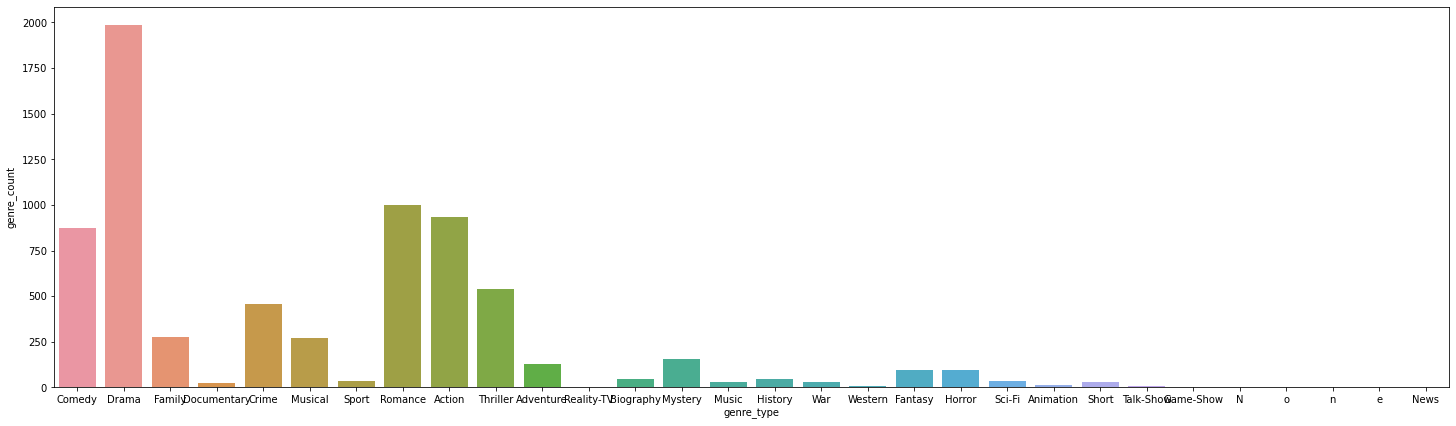

In [ ]:
plt.figure(figsize=(25,7))
sns.barplot(x=genre_distribution['genre_type'],y=genre_distribution['genre_count'])
plt.show()

***Top 10 most acted actors***

In [ ]:
frequency_castnames = sorted(frequency_castnames.items(), key =lambda kv:(kv[1], kv[0]),reverse=True)
frequency_castnames[:10]

[("'", 136940),
 ('a', 133987),
 (' ', 129113),
 (',', 65657),
 ('h', 55207),
 ('i', 54075),
 ('n', 51539),
 ('r', 51451),
 ('e', 44400),
 ('o', 25337)]

# ***Build a REST API***


GET top n popular movies 

In [ ]:
TopMovies_df = pd.DataFrame()
topmovies = imdb.IMDb()
top_moviesDB = topmovies.get_popular100_movies()
for i in range(len(top_moviesDB)):
  movies = topmovies.search_movie(top_moviesDB[i]['title'])
  if (movies):
      id = movies[0].getID()
      movie = topmovies.get_movie(id)
      print(top_moviesDB[i]['title'])
      try:
          title = movie['title']
      except:
        title = 'None'
      try:
        year = movie['year']
      except:
        year = 'None'
      try:
        rating = movie['rating']
      except:
        rating = 'None'
      try:
        Genre = movie['genre']
      except:
        Genre = 'None'
      try:
        imdbID = movie['imdbID']
      except:
        imdbID = 'None'
      columns = [title,year,rating,Genre,imdbID]
      #print(columns)
      #plot_keywords = movie["synopsis"]
      GENRE = ''
      for g in Genre:
          GENRE = GENRE+g+','
      GENRE = GENRE[:-1]
      df2= pd.DataFrame({
          'title':title,
          'IMDB id':id,
          'year':year,
          'genre': GENRE,
          'rating': rating,
      },index=[0])
      TopMovies_df = TopMovies_df.append(df2,ignore_index=True)

Top Gun: Maverick
Top Gun
Chip 'n Dale: Rescue Rangers
Thor: Love and Thunder
Everything Everywhere All at Once
Winnie-The-Pooh: Blood and Honey
Doctor Strange in the Multiverse of Madness
The Northman
Senior Year
Three Thousand Years of Longing
Mission: Impossible - Dead Reckoning - Part One
The Batman
A Perfect Pairing
The Lost City
Elvis
Men
Morbius
Aquaman
X
The Gray Man
The Valet
Downton Abbey: A New Era
Sonic the Hedgehog 2
Memory
Goodfellas
Operation Mincemeat
Jurassic World Dominion
Crimes of the Future
Uncharted
Ghostbusters: Afterlife
The Bad Guys
Death on the Nile
Fantastic Beasts: The Secrets of Dumbledore
Old
RRR
Avatar: The Way of Water
Spider-Man: No Way Home
The Godfather
The Rum Diary
Dual
Toscana
Firestarter
The Lincoln Lawyer
Ambulance
Pirates of the Caribbean: The Curse of the Black Pearl
365 Days: This Day
365 Days
Bhool Bhulaiyaa 2
Dune
Good Mourning
Willow
Triangle of Sadness
Jurassic Park
Jackass Forever
2000 Mules
Emergency
The Bob's Burgers Movie
Dhaakad
India

**GET top n popular movies with additional filtering**

In [ ]:
TopMovies_df.head()

,title,IMDB id,year,genre,rating
0,Top Gun: Maverick,1745960,2022,"Action,Drama",8.7
1,Top Gun: Maverick,1745960,2022,"Action,Drama",8.7
2,Chip 'n Dale: Rescue Rangers,3513500,2022,"Animation,Adventure,Comedy,Family,Mystery",7.1
3,Thor: Love and Thunder,10648342,2022,"Action,Adventure,Comedy,Fantasy,Music,Romance,...",None
4,Everything Everywhere All at Once,6710474,2022,"Action,Adventure,Comedy,Fantasy,Sci-Fi",8.4


In [ ]:
TopMovies_df['rating'].replace('None',0,inplace=True)
TopMovies_df['rating'] = TopMovies_df['rating'].astype('int')
TopMovies_df.head()

,title,IMDB id,year,genre,rating
0,Top Gun: Maverick,1745960,2022,"Action,Drama",8
1,Top Gun: Maverick,1745960,2022,"Action,Drama",8
2,Chip 'n Dale: Rescue Rangers,3513500,2022,"Animation,Adventure,Comedy,Family,Mystery",7
3,Thor: Love and Thunder,10648342,2022,"Action,Adventure,Comedy,Fantasy,Music,Romance,...",0
4,Everything Everywhere All at Once,6710474,2022,"Action,Adventure,Comedy,Fantasy,Sci-Fi",8


In [ ]:
tm = TopMovies_df.groupby(['year','rating']).count()

In [ ]:
tm

,,title,IMDB id,genre
year,rating,,,
1972,9,1,1,1
1977,8,1,1,1
1985,7,1,1,1
1990,8,1,1,1
1993,8,1,1,1
1994,9,1,1,1
1999,7,1,1,1
2000,7,1,1,1
2003,8,1,1,1


In [ ]:
import plotly.express as px


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


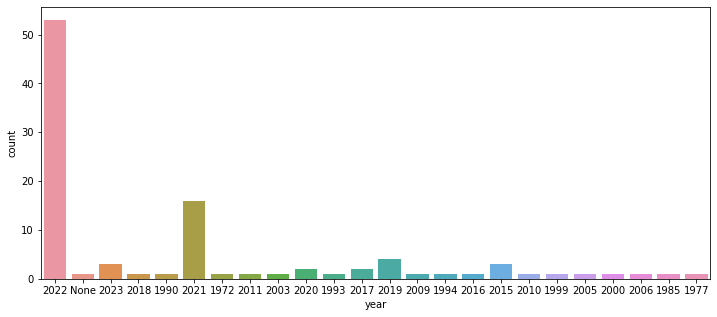

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(TopMovies_df['year'])